# Binary Search Tree
<br/>
A binary search tree is a binary tree where, for every node, all values in its left subtree are smaller and all values in its right subtree are larger.

In [1]:
arr = [6, 3, 11, 5, 7, 18, 12, 2, 13]

## Definition of Node class

In [2]:
from types import MethodType
from typing import List, Optional, Tuple

class Node:
    def __init__(self, value_ = 0):
        self.value = value_
        self.left = None
        self.right = None

    def __eq__(self, other: object):
        if other is None:
            return False
        return self.value == other.value

## Method to insert a new value in the tree

In [3]:
def insert(self, value_: int):
    if value_ < self.value:
        if self.left is None:
            self.left = Node(value_)
        else:
            self.left.insert(value_)
    if value_ > self.value:
        if self.right is None:
            self.right = Node(value_)
        else:
            self.right.insert(value_)

## Method to traverse the tree

In [4]:
def traverse(self, indicator_ = "root"):
    print(f"{indicator_} = {self.value}")
    
    if not self.left is None:
        self.left.traverse("left")
    if not self.right is None:
        self.right.traverse("right")

## Method to search for a key in the tree

In [5]:
def search(self, value_: int) -> bool:
    if self.value == value_:
        return True
    
    if value_ < self.value:
        if self.left is None:
            return False
        return self.left.search(value_)
    
    if value_ > self.value:
        if self.right is None:
            return False
        return self.right.search(value_)

## Method to find the maximum and minumum nodes of the tree

In [6]:
def __findMinMaxNode__(self, deleteNode = False, minQuery = True) -> object:
    currentNode = self
    prevNode = None

    if minQuery:
        while not currentNode.left is None:
            if deleteNode:
                prevNode = currentNode
            currentNode = currentNode.left
    else:
        while not currentNode.right is None:
            if deleteNode:
                prevNode = currentNode
            currentNode = currentNode.right

    if deleteNode and not prevNode is None:
        if minQuery:
            prevNode.left = None
        else:
            prevNode.right = None
    return currentNode

def findMinMaxValue(self, minQuery = True) -> int:
    return self.__findMinMaxNode__(False, minQuery).value

## Method to delete a node of the tree

In [7]:
def deleteNode(self, value_: int, isRootNode = True) -> Tuple[bool, Optional[object]]:
    if self.value == value_:  # base condition

        if isRootNode:
            # case 1: leaf node
            if self.left is None and self.right is None:
                self.value = 0
                self.left, self.right = None, None
                return None
            
            # case 2: if node has only 1 child
            if self.left is None and not self.right is None:
                self.value = self.right.value
                self.left = self.right.left
                self.right = self.right.right
                return None
            
            if not self.left is None and self.right is None:
                self.value = self.left.value
                self.left = self.left.left
                self.right = self.left.right
                return None
            
            newNode = self.right.__findMinMaxNode__(deleteNode = True)
            self.right.left = newNode.right          
            self.value = newNode.value
            return None
        
        # case 1: leaf node
        if self.left is None and self.right is None:
            return (True, None)
        
        # case 2: if node has only 1 child
        if self.left is None and not self.right is None:
            return (True, self.right)
        if not self.left is None and self.right is None:
            return (True, self.left)
        
        # case 3: has both children
        # method-1: inorder successor (minimum of right sub-tree)
        newNode = self.right.__findMinMaxNode__(deleteNode = True)
        self.right.left = newNode.right

        # method-2: inorder predecessor (maximum of left sub-tree)
        # newNode  = self.left.__findMinMaxNode__(True, False)
        # self.left.right = newNode.left

        if not newNode == self.left:
            newNode.left = self.left
        if not newNode == self.right:
            newNode.right = self.right

        return (True, newNode)
    
    if value_ < self.value:
        if self.left is None:
            raise IndexError("Key not found")
        remove, node = self.left.deleteNode(value_, False)

        if remove:
            self.left = node
    
    if value_ > self.value:
        if self.right is None:
            raise IndexError("Key not found")
        remove, node = self.right.deleteNode(value_, False)

        if remove:
            self.right = node

    return (False, None)

## Binding all the methods to the class

In [8]:
Node.insert = insert
Node.search = search
Node.traverse = traverse
Node.__findMinMaxNode__ = __findMinMaxNode__
Node.findMinMaxValue = findMinMaxValue
Node.deleteNode = deleteNode

## Method to create a binary tree from an array

In [9]:
def createBinarySearchTree(array: List[int], rootNode: Node):
    rootNode.value = array[0]

    for i in range(1, len(array)):
        rootNode.insert(array[i])

## Driver code

In [10]:
root = Node()
createBinarySearchTree(arr, root)
root.traverse()

root = 6
left = 3
left = 2
right = 5
right = 11
left = 7
right = 18
left = 12
right = 13


## Current state of the tree
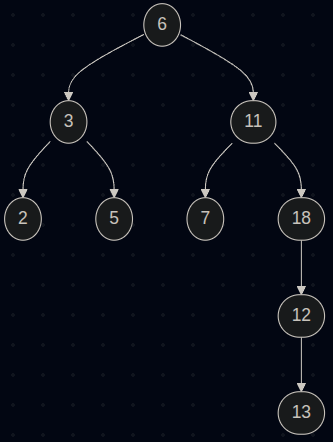

## Search for a node

In [11]:
nums = [11, 2, 8]

for n in nums:
    if root.search(n):
        print(f"{n} found")
    else:
        print(f"{n} not found")

11 found
2 found
8 not found


In [12]:
print(f"Minimum value = {root.findMinMaxValue(True)}")
print(f"Maximum value = {root.findMinMaxValue(False)}")

Minimum value = 2
Maximum value = 18


## Deleting a node

In [13]:
root.deleteNode(11)
root.traverse()

root = 6
left = 3
left = 2
right = 5
right = 12
left = 7
right = 18
left = 13


## Current state of the tree
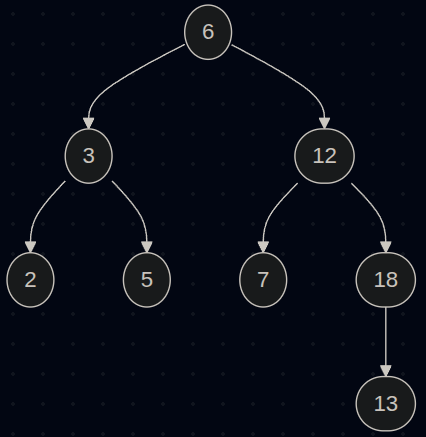

## Deleting the root node

In [14]:
root.deleteNode(6)
root.traverse()

root = 7
left = 3
left = 2
right = 5
right = 12
right = 18
left = 13


## Final state of the tree
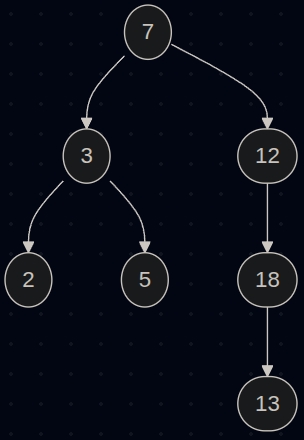
***